






































































































































































































































































































































































































































































































































# Customer Attrition

Customer attrition, also known as customer churn is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics  because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

In [172]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [173]:
#Setting the directries
os.chdir("Z:/Edwisor Projects(24-02-2018)")
os.getcwd()

'Z:\\Edwisor Projects(24-02-2018)'

In [174]:
#Reading the File
telcom = pd.read_csv(r"Train_data.csv")
test = pd.read_csv(r"Test_data.csv")
#first few rows
telcom.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [175]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  3333
Columns  :  21

Features : 
 ['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'number customer service calls', 'Churn']

Missing values :   0

Unique values :  
 state                              51
account length                    212
area code                           3
phone number                     3333
international plan                  2
voice mail plan                     2
number vmail messages              46
total day minutes                1667
total day calls                   119
total day charge                 1667
total eve minutes                1611
total eve calls                   123
total eve charge                 1440
tota

In [176]:
# new data frame with split value columns 
new = telcom["phone number"].str.split("-", n = 1, expand = True) 
  
# making seperate last index from new data frame and creating a new column id
telcom["id"]= new[1]

In [177]:
#convert to float type
telcom["number vmail messages"] = telcom["number vmail messages"].astype(float)
telcom["total day calls"] = telcom["total day calls"].astype(float)
telcom["total eve calls"] = telcom["total eve calls"].astype(float)
telcom["total night calls"] = telcom["total night calls"].astype(float)
telcom["total intl calls"] = telcom["total intl calls"].astype(float)
telcom["number customer service calls"] = telcom["number customer service calls"].astype(float)


In [178]:
#number vmail messages to categorical column
def number_of_vmail_message_lab(telcom) :
    
    if telcom["number vmail messages"] <= 12 :
        return "number_of_vmail_message_0-12"
    elif (telcom["number vmail messages"] > 12) & (telcom["number vmail messages"] <= 24 ):
        return "number_of_vmail_message_12-24"
    elif (telcom["number vmail messages"] > 24) & (telcom["number vmail messages"] <= 36) :
        return "number_of_vmail_message_24-36"
    elif (telcom["number vmail messages"] > 36) & (telcom["number vmail messages"] <= 48) :
        return "number_of_vmail_message_36-48"


telcom["number vmail messages"] = telcom.apply(lambda telcom:number_of_vmail_message_lab(telcom),axis = 1)

#total day calls to categorical column
def total_day_calls_lab(telcom):
    if telcom["total day calls"] <=50 :
        return "total_day_calls_0-50"
    elif (telcom["total day calls"] >50) & (telcom["total day calls"]<=100):
        return "total_day_calls_50-100"
    elif (telcom["total day calls"] >100) & (telcom["total day calls"]<=150):
        return "total_day_calls_100-150"
    elif telcom["total day calls"] >150:
        return "total_day_calls_gt-150"
telcom["total day calls"] = telcom.apply(lambda telcom:total_day_calls_lab(telcom),axis = 1)

#total eve calls to categorical column
def total_eve_calls_lab(telcom):
    if (telcom["total eve calls"] >50) & (telcom["total eve calls"] <= 80):
        return "total_eve_calls_50-80"
    elif (telcom["total eve calls"] >80) & (telcom["total eve calls"] <=110):
        return "total_eve_calls_80-110"
    elif (telcom["total eve calls"] >110) & (telcom["total eve calls"] <=140):
        return "total_eve_calls_110-140"
    elif telcom["total eve calls"] >140:
        return "total_eve_Calls_gt-140"
telcom["total eve calls"] = telcom.apply(lambda telcom:total_eve_calls_lab(telcom),axis =1)

#total night calls to categorical column
def total_night_calls_lab(telcom):
    if telcom["total night calls"]< 50:
        return "total_night_calls_lt-50"
    elif (telcom["total night calls"] > 50) & (telcom["total night calls"] <= 100):
        return "total_night_calls_50-100"
    elif (telcom["total night calls"] >100) & (telcom["total night calls"] <= 150):
        return "total_night_Calls_100-150"
    elif telcom["total night calls"] >150:
        return "total_night_calls_gt-150"
telcom["total night calls"]= telcom.apply(lambda telcom:total_night_calls_lab(telcom),axis=1)

#total intl calls to categorical column
def total_intl_calls_lab(telcom):
    if telcom["total intl calls"]< 5:
        return "total_intl_calls_lt-5"
    elif (telcom["total intl calls"] >= 5) & (telcom["total intl calls"] < 10):
        return "total_intl_calls_5-10"
    elif (telcom["total intl calls"] >= 10) & (telcom["total intl calls"] < 15):
        return "total_intl_Calls_10-15"
    elif telcom["total intl calls"] >15:
        return "total_intl_calls_gt-15"
telcom["total intl calls"]= telcom.apply(lambda telcom:total_intl_calls_lab(telcom),axis=1)

#number customer service calls to categorical column
def number_customer_service_calls_lab(telcom):
    if telcom["number customer service calls"]<= 2:
        return "number_customer_service_calls_lt_0-2"
    elif (telcom["number customer service calls"] > 2) & (telcom["number customer service calls"] <= 4):
        return "number_customer_service_calls_2-4"
    elif (telcom["number customer service calls"] > 4) & (telcom["number customer service calls"] <= 6):
        return "number_customer_service_calls_4-6"
    elif telcom["number customer service calls"] >6:
        return "number_customer_service_calls_gt-6"
telcom["number customer service calls"]= telcom.apply(lambda telcom:number_customer_service_calls_lab(telcom),axis=1)



#Separating churn and non churn customers
churn     = telcom[telcom["Churn"].values == 1]
not_churn = telcom[telcom["Churn"].values == 0]

#Separating catagorical and numerical columns
Id_col     = ['id']
Phone_no = ["phone number"]
state_col=["state"]
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col + Phone_no + state_col]
telcom.describe()

,account length,area code,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,179.775098,30.562307,200.980348,17.083540,200.872037,9.039325,10.237294,2.764581,0.144914
std,39.822106,42.371290,54.467389,9.259435,50.713844,4.310668,50.573847,2.275873,2.791840,0.753773,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,23.200000,1.040000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,143.700000,24.430000,166.600000,14.160000,167.000000,7.520000,8.500000,2.300000,0.000000
50%,101.000000,415.000000,179.400000,30.500000,201.400000,17.120000,201.200000,9.050000,10.300000,2.780000,0.000000
75%,127.000000,510.000000,216.400000,36.790000,235.300000,20.000000,235.300000,10.590000,12.100000,3.270000,0.000000
max,243.000000,510.000000,350.800000,59.640000,363.700000,30.910000,395.000000,17.770000,20.000000,5.400000,1.000000


In [179]:
num_cols

['account length',
 'total day minutes',
 'total day charge',
 'total eve minutes',
 'total eve charge',
 'total night minutes',
 'total night charge',
 'total intl minutes',
 'total intl charge']

In [180]:
#labels
lab = telcom["Churn"].value_counts().keys().tolist()
#values
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

In [181]:
 #function  for scatter plot matrix  for total internaltional plan columns in data
def scatter_matrix_total_intl_calls(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "total intl calls",
                                       values = df["total intl calls"]),
                                  dict(label  = 'total intl minutes',
                                       values = df['total intl minutes']),
                                  dict(label  = 'total intl charge',
                                       values = df['total intl charge'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for International Plan columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)
    

#function  for scatter plot matrix  for total internaltional plan columns in data
def scatter_matrix_total_eve_calls(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "total eve calls",
                                       values = df["total eve calls"]),
                                  dict(label  = 'total eve minutes',
                                       values = df['total eve minutes']),
                                  dict(label  = 'total eve charge',
                                       values = df['total eve charge'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Evening Calls columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

    
#function  for scatter plot matrix  for total day plan columns in data
def scatter_matrix_total_day_calls(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "total day calls",
                                       values = df["total day calls"]),
                                  dict(label  = 'total day minutes',
                                       values = df['total day minutes']),
                                  dict(label  = 'total day charge',
                                       values = df['total day charge'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Day Calls columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)
 
    
#scatter plot matrix
scatter_matrix_total_intl_calls(telcom)
scatter_matrix_total_eve_calls(telcom)
scatter_matrix_total_day_calls(telcom)


In [182]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

In [183]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

for i in num_cols :
    histogram(i)

In [184]:
#cusomer attrition in tenure groups
def barchart(column) :
    tg_ch  =  churn[column].value_counts().reset_index()
    tg_ch.columns  = [column,"count"]
    tg_nch =  not_churn[column].value_counts().reset_index()
    tg_nch.columns = [column,"count"]

    #bar - churn
    trace1 = go.Bar(x = tg_ch[column]  , y = tg_ch["count"],
                name = "Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

    #bar - not churn
    trace2 = go.Bar(x = tg_nch[column] , y = tg_nch["count"],
                name = "Non Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

    layout = go.Layout(dict(title = "Customer attrition in " +column+ " groups",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Customer Churn Reports",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
    data = [trace1,trace2]
    fig  = go.Figure(data=data,layout=layout)
    py.iplot(fig)

for i in cat_cols :
    barchart(i)

In [185]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['phone number']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
state_col =['state']
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col+state_col]
#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")


In [186]:
#variable summary
summary = (df_telcom_og[[i for i in df_telcom_og.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [187]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [188]:
#Baseline Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)



cols    = [i for i in train.columns if i not in Id_col + target_col+Id_col + Phone_no + state_col]
train_X = train[cols]
train_Y = train[target_col]

test_X  = test[cols]
test_Y  = test[target_col]

#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model
    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,cols,"coefficients",threshold_plot = True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       717
           1       0.55      0.25      0.34       117

   micro avg       0.87      0.87      0.87       834
   macro avg       0.72      0.61      0.63       834
weighted avg       0.84      0.87      0.84       834

Accuracy   Score :  0.8657074340527577
Area under curve :  0.6071952222579837 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



In [189]:
#Univariate Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#select columns
cols = [i for i in telcom.columns if i not in Id_col + target_col + state_col ]

#dataframe with non negative values
df_x = df_telcom_og[cols]
df_y = df_telcom_og[target_col]

#fit model with k= 3
select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(df_x,df_y)

#Summerize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":cols,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)


#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

#plot
trace  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
                    y = score[score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

trace1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
                y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[trace,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

scores
[2.03244178e+02 2.51569590e+01 3.03791543e-03 7.16585145e-02
 1.02844261e-01 8.85460679e+00 1.49344690e+01 7.76545133e+00
 3.28205074e+00 8.49348153e+00 1.28271923e+00 2.63567027e+00
 2.23980759e+00 1.93561707e-05 1.24557556e-01 7.94482448e-02
 1.05073995e-01 6.25447339e-04 3.86468204e-04 2.41791435e-01
 1.62798954e-01 1.35088626e-01 7.14821298e+00 2.56039555e-02
 4.45331317e+00 1.54730153e+01 1.56024122e+02 2.32212764e+01
 2.01480635e+01 1.43041969e+01 2.31416931e+03 3.93399658e+02
 3.67164781e+02 3.12019307e+01 5.34465062e+01 2.40554205e+00
 1.18130812e+01 3.19059341e+00 5.11721169e+02]
P - Values
[4.09173473e-046 5.28486023e-007 9.56045023e-001 7.88937116e-001
 7.48442744e-001 2.92350091e-003 1.11310572e-004 5.32549881e-003
 7.00413601e-002 3.56421116e-003 2.57394052e-001 1.04487956e-001
 1.34497715e-001 9.96489666e-001 7.24143074e-001 7.78046529e-001
 7.45823573e-001 9.80047829e-001 9.84315562e-001 6.22915229e-001
 6.86592553e-001 7.13213243e-001 7.50387184e-003 8.72871337e-

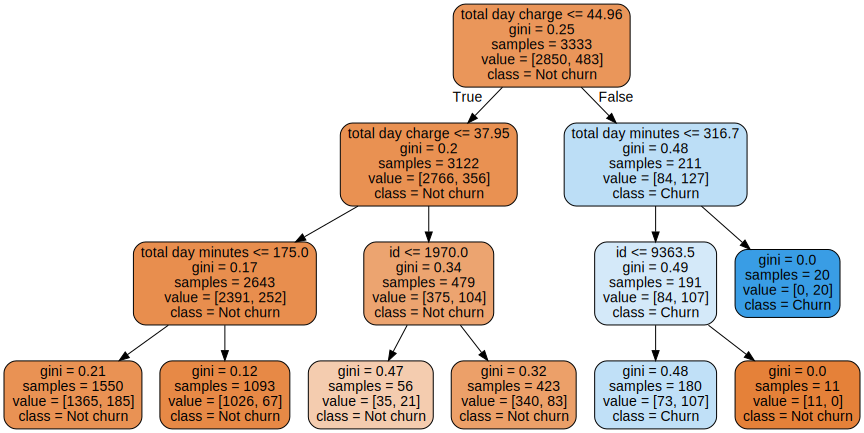

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

#top 3 categorical features
features_cat  = score[score["feature_type"] == "Categorical"]["features"][:3].tolist()

#top 3 numerical features
features_num  = score[score["feature_type"] == "Numerical"]["features"][:3].tolist()


def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    #separating dependent and in dependent variables
    dtc_x = df_x[columns]
    dtc_y = df_y[target_col]
    
    #model
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dtc_x,dtc_y)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(dt_classifier,
                                 dtc_x,test_X[columns],
                                 dtc_y,test_Y,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(features_num,3,"gini","best")

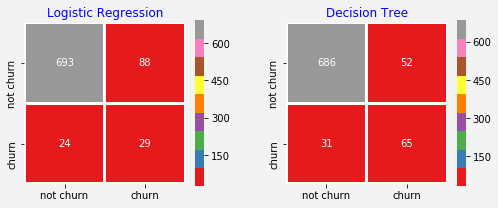

In [191]:

lst    = [logit,decision_tree]

length = len(lst)

mods   = ['Logistic Regression','Decision Tree']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(predictions,test_Y)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

In [195]:
#Accuracy for Logistic Regression
((693+29)/(693+29+24+88))

0.8657074340527577

In [196]:
#Accuracy for Decision tree
((686+65)/(686+65+52+31))

0.9004796163069544

In [193]:
#Model Evaluation

from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,train_X,test_X,train_Y,test_Y,name) :
    model.fit(train_X,train_Y)
    predictions  = model.predict(test_X)
    accuracy     = accuracy_score(test_Y,predictions)
    recallscore  = recall_score(test_Y,predictions)
    precision    = precision_score(test_Y,predictions)
    roc_auc      = roc_auc_score(test_Y,predictions)
    f1score      = f1_score(test_Y,predictions) 
    kappa_metric = cohen_kappa_score(test_Y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Regression")

decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,
                      "Decision Tree")

#concat all models
model_performances = pd.concat([model1,model4],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)